## Empowering Financial Security
## Detecting Fraudulent Transactions using Advanced Machine Learning Techniques and Predictive Analytics

### Problem Statement

Develop a machine learning model to detect potentially fraudulent transactions based on the provided features. The dataset contains information about various transactions, including account age, payment method, time of transaction, and category. The goal is to build a classification model that can accurately classify transactions as either legitimate or potentially fraudulent.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

### Importing Dataset

In [2]:
data = pd.read_csv('payment_fraud_data.csv')

In [3]:
data = pd.read_csv('payment_fraud.csv')

### Understanding the data

In [4]:
# Display the first few rows of the dataset
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,17:53:23,paypal,28.204861,shopping,0.0,0
1,725,1,17:48:55,storecredit,0.000000,electronics,0.0,0
2,845,1,22:06:42,creditcard,0.000000,food,1.0,0
3,503,1,21:16:46,creditcard,0.000000,electronics,1.0,0
4,2000,1,00:58:56,creditcard,0.000000,shopping,0.0,0


In [5]:
data.shape

(39221, 8)

In [6]:
# Check for missing values
data.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [7]:
# Basic statistics of the dataset
data.describe()

,accountAgeDays,numItems,paymentMethodAgeDays,isWeekend,label
count,39221.000000,39221.000000,39221.000000,38661.000000,39221.000000
mean,857.563984,1.084751,122.641326,0.499547,0.014278
std,804.788212,0.566899,283.569177,0.500006,0.118636
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,72.000000,1.000000,0.000000,0.000000,0.000000
50%,603.000000,1.000000,0.012500,0.000000,0.000000
75%,1804.000000,1.000000,87.510417,1.000000,0.000000
max,2000.000000,29.000000,1999.580556,1.000000,1.000000


In [8]:
data.isnull().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                 95
isWeekend               560
label                     0
dtype: int64

In [9]:
data.nunique()

accountAgeDays           1999
numItems                   14
localTime                  25
paymentMethod               3
paymentMethodAgeDays    17094
Category                    3
isWeekend                   2
label                       2
dtype: int64

In [10]:
data.dtypes

accountAgeDays            int64
numItems                  int64
localTime                object
paymentMethod            object
paymentMethodAgeDays    float64
Category                 object
isWeekend               float64
label                     int64
dtype: object

In [11]:
data['label'].unique()

array([0, 1], dtype=int64)

In [12]:
data.dtypes

accountAgeDays            int64
numItems                  int64
localTime                object
paymentMethod            object
paymentMethodAgeDays    float64
Category                 object
isWeekend               float64
label                     int64
dtype: object

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

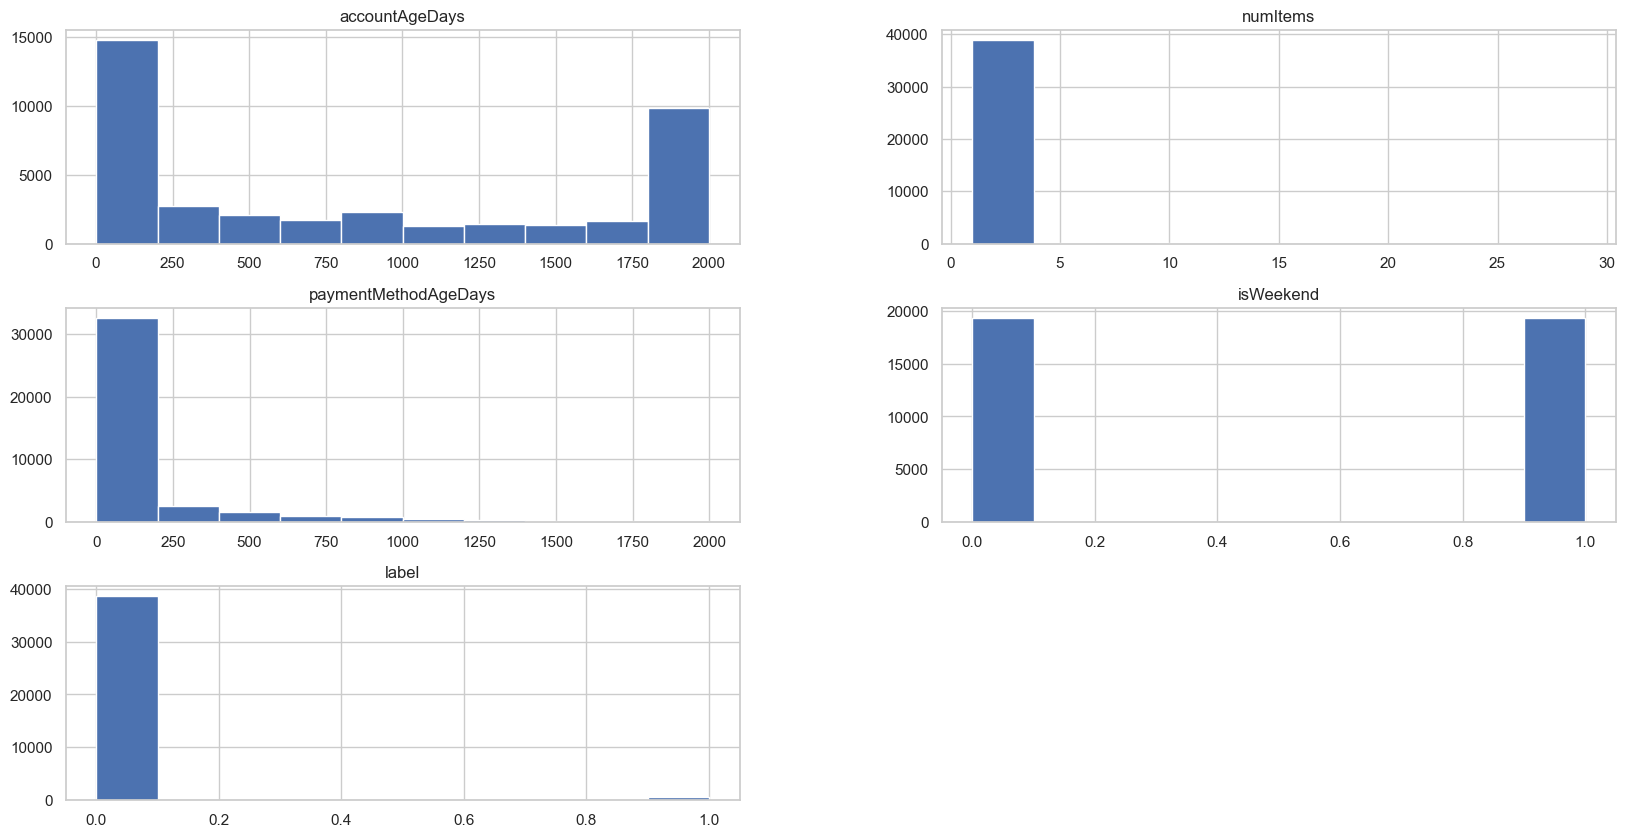

In [14]:
data.hist(figsize=(20, 10))
plt.show()

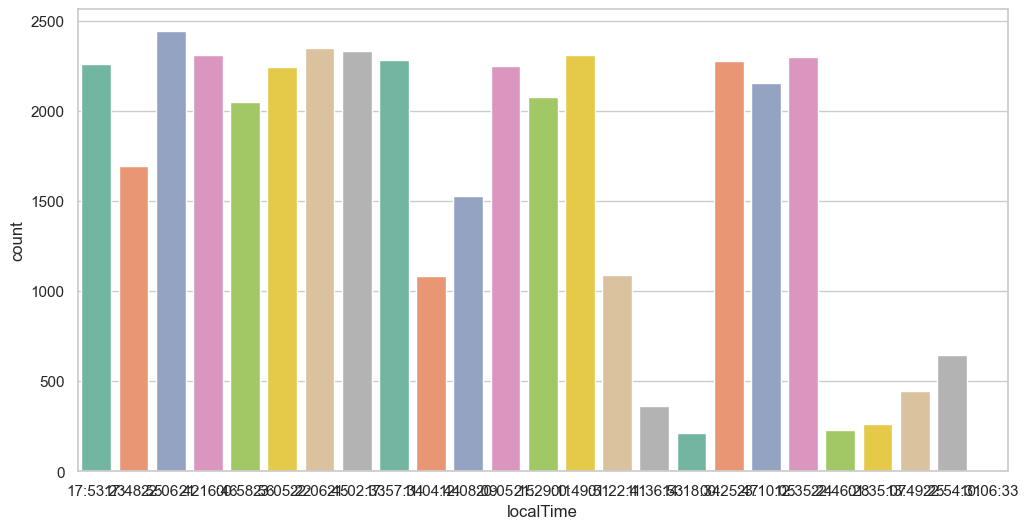

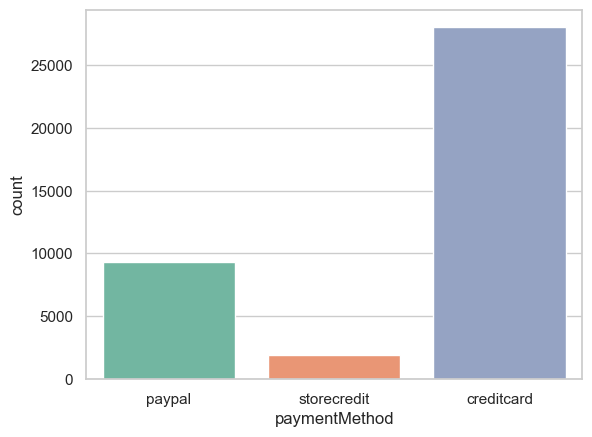

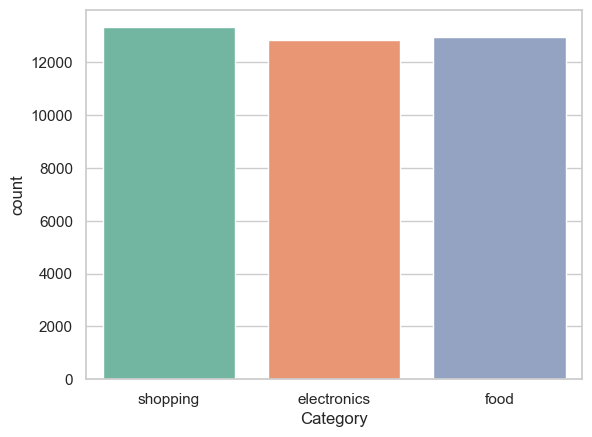

In [15]:
plt.figure(figsize=(12, 6))
for column in data.select_dtypes(include='object'):
    sns.countplot(x=column, data=data, palette="Set2")
    plt.show()

#### Data Preprocessing

Clean and preprocess the data by handling missing values and encoding categorical variables.

In [16]:
data.columns

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'Category', 'isWeekend', 'label'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
# Initialize the label encoder
label_encoder = LabelEncoder()
# Iterate through each column and apply label encoding for categorical columns
for column in data.select_dtypes(include=['object']):
    data[column] = label_encoder.fit_transform(data[column])
data

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,13,1,28.204861,2,0.0,0
1,725,1,12,2,0.000000,0,0.0,0
2,845,1,19,0,0.000000,1,1.0,0
3,503,1,17,0,0.000000,0,1.0,0
4,2000,1,2,0,0.000000,2,0.0,0
...,...,...,...,...,...,...,...,...
39216,986,1,15,0,0.000000,2,0.0,0
39217,1647,1,16,0,377.930556,2,0.0,0
39218,1591,1,12,0,0.000000,2,1.0,0
39219,237,1,19,0,236.082639,2,1.0,0


In [18]:
data.dtypes

accountAgeDays            int64
numItems                  int64
localTime                 int32
paymentMethod             int32
paymentMethodAgeDays    float64
Category                  int32
isWeekend               float64
label                     int64
dtype: object

In [19]:
data.isna().sum()

accountAgeDays            0
numItems                  0
localTime                 0
paymentMethod             0
paymentMethodAgeDays      0
Category                  0
isWeekend               560
label                     0
dtype: int64

In [20]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
data['isWeekend'] = imputer.fit_transform(data[['isWeekend']])

In [21]:
data.isna().sum()

accountAgeDays          0
numItems                0
localTime               0
paymentMethod           0
paymentMethodAgeDays    0
Category                0
isWeekend               0
label                   0
dtype: int64

In [22]:
data.dtypes

accountAgeDays            int64
numItems                  int64
localTime                 int32
paymentMethod             int32
paymentMethodAgeDays    float64
Category                  int32
isWeekend               float64
label                     int64
dtype: object

In [23]:
data.head()

,accountAgeDays,numItems,localTime,paymentMethod,paymentMethodAgeDays,Category,isWeekend,label
0,29,1,13,1,28.204861,2,0.0,0
1,725,1,12,2,0.000000,0,0.0,0
2,845,1,19,0,0.000000,1,1.0,0
3,503,1,17,0,0.000000,0,1.0,0
4,2000,1,2,0,0.000000,2,0.0,0


### Feature Engineering

In [24]:
# Create a new feature by combining 'accountAgeDays' and 'paymentMethodAgeDays'
data['totalAge'] = data['accountAgeDays'] + data['paymentMethodAgeDays']

data[['accountAgeDays','paymentMethodAgeDays','totalAge']]

,accountAgeDays,paymentMethodAgeDays,totalAge
0,29,28.204861,57.204861
1,725,0.000000,725.000000
2,845,0.000000,845.000000
3,503,0.000000,503.000000
4,2000,0.000000,2000.000000
...,...,...,...
39216,986,0.000000,986.000000
39217,1647,377.930556,2024.930556
39218,1591,0.000000,1591.000000
39219,237,236.082639,473.082639


In [25]:
cols = data.select_dtypes(include=['number']).columns
cols

Index(['accountAgeDays', 'numItems', 'localTime', 'paymentMethod',
       'paymentMethodAgeDays', 'Category', 'isWeekend', 'label', 'totalAge'],
      dtype='object')

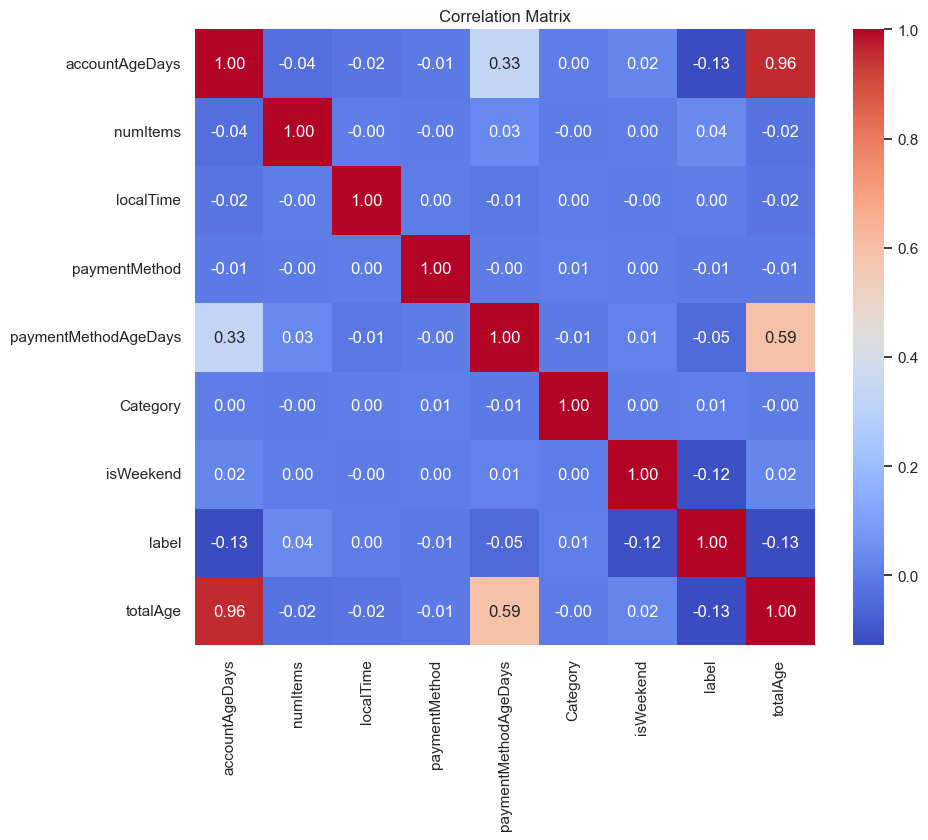

In [26]:
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

plt.show()

In [27]:
data['label'].unique()

array([0, 1], dtype=int64)

### Model Selection

In [28]:
# Split the dataset into features and labels
X = data.drop('label', axis=1)
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Select a machine learning model (logistic Regression Classifier)
model = RandomForestClassifier()
model

RandomForestClassifier()

### Model Training

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

In [29]:
# Train the model with the best hyperparameters
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

### Model Evaluation

Evaluate the model's performance using relevant metrics like accuracy, precision, recall, and F1-score.

In [30]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and display evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Model Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1)
print("Confusion Matrix:\n", conf_matrix)

Model Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0
Confusion Matrix:
 [[7727    0]
 [   0  118]]
